In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('dataset/listings.csv')

In [31]:
df.columns.shape

(92,)

In [68]:
columns=['host_since','host_response_rate','host_acceptance_rate','host_is_superhost','host_total_listings_count','host_has_profile_pic','host_identity_verified','latitude','longitude','is_location_exact', 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 'calendar_updated', 'has_availability','availability_30', 'availability_60', 'availability_90','availability_365','number_of_reviews','first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture','require_guest_phone_verification', 'calculated_host_listings_count','reviews_per_month']
len(columns)

51

In [69]:
df_1 = df[columns]
df_1 = df_1.dropna(axis = 0, subset=['price'])

df_1['price'] = df_1.price.str.replace(",","").str.replace("$","").astype(float)
df_1['weekly_price'] = df_1.weekly_price.str.replace(",","").str.replace("$","").astype(float)
df_1['monthly_price'] = df_1.monthly_price.str.replace(",","").str.replace("$","").astype(float)
df_1['security_deposit'] = df_1.security_deposit.str.replace(",","").str.replace("$","").astype(float)
df_1['cleaning_fee'] = df_1.cleaning_fee.str.replace(",","").str.replace("$","").astype(float)
df_1['extra_people'] = df_1.extra_people.str.replace(",","").str.replace("$","").astype(float)

df_1['host_is_superhost'] = df_1.host_is_superhost.str.replace("t","1").str.replace("f","0").astype(float)
df_1['host_has_profile_pic'] = df_1.host_has_profile_pic.str.replace("t","1").str.replace("f","0").astype(float)
df_1['host_identity_verified'] = df_1.host_identity_verified.str.replace("t","1").str.replace("f","0").astype(float)
df_1['is_location_exact'] = df_1.is_location_exact.str.replace("t","1").str.replace("f","0").astype(float)
df_1['has_availability'] = df_1.has_availability.str.replace("t","1").str.replace("f","0").astype(float)
df_1['requires_license'] = df_1.requires_license.str.replace("t","1").str.replace("f","0").astype(float)
df_1['instant_bookable'] = df_1.instant_bookable.str.replace("t","1").str.replace("f","0").astype(float)
df_1['require_guest_profile_picture'] = df_1.require_guest_profile_picture.str.replace("t","1").str.replace("f","0").astype(float)
df_1['require_guest_phone_verification'] = df_1.require_guest_phone_verification.str.replace("t","1").str.replace("f","0").astype(float)
df_1.describe()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3160.000000,3167.000000,3163.000000,3162.000000,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3191.000000
mean,0.203878,7.157757,0.998166,0.785377,47.628961,-122.333103,0.893662,3.349398,1.259469,1.307712,...,9.786709,9.809599,9.608916,9.452245,0.0,0.154793,0.084075,0.098219,2.946307,2.078919
std,0.402932,28.628149,0.042796,0.410614,0.043052,0.031745,0.308311,1.977599,0.590369,0.883395,...,0.595499,0.568211,0.629053,0.750259,0.0,0.361755,0.277537,0.297649,5.893029,1.822348
min,0.000000,1.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,4.000000,2.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.020000
25%,0.000000,1.000000,1.000000,1.000000,47.609418,-122.354320,1.000000,2.000000,1.000000,1.000000,...,10.000000,10.000000,9.000000,9.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.695000
50%,0.000000,1.000000,1.000000,1.000000,47.623601,-122.328874,1.000000,3.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.540000
75%,0.000000,3.000000,1.000000,1.000000,47.662694,-122.310800,1.000000,4.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,0.0,0.000000,0.000000,0.000000,2.000000,3.000000
max,1.000000,502.000000,1.000000,1.000000,47.733358,-122.240607,1.000000,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,0.0,1.000000,1.000000,1.000000,37.000000,12.150000


In [108]:
to_drop = ['host_has_profile_pic','requires_license', 'require_guest_profile_picture', 'require_guest_phone_verification','has_availability','square_feet'] 
df_1drop = df_1.drop(to_drop,axis = 1)
df_dropna = df_1drop.dropna(axis = 0, how = 'any')
numeric = df_dropna[df_dropna.columns].describe()
df_totrain = df_dropna[numeric.columns]
df_totrain.describe()


,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.284144,8.244898,0.871272,47.628738,-122.331105,0.941915,3.612245,1.243328,1.312402,1.839874,...,93.722135,9.555730,9.511774,9.712716,9.733124,9.527473,9.372057,0.221350,5.733124,1.998854
std,0.451360,13.363907,0.335162,0.043578,0.032050,0.234087,2.030903,0.585845,0.883845,1.115688,...,7.921174,0.849779,0.860709,0.742284,0.689808,0.707961,0.867678,0.415482,10.085065,1.644115
min,0.000000,1.000000,0.000000,47.510164,-122.415848,0.000000,1.000000,0.500000,0.000000,1.000000,...,20.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000,0.030000
25%,0.000000,1.000000,1.000000,47.607951,-122.351988,1.000000,2.000000,1.000000,1.000000,1.000000,...,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,0.790000
50%,0.000000,2.000000,1.000000,47.625135,-122.328787,1.000000,3.000000,1.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.480000
75%,1.000000,6.000000,1.000000,47.661546,-122.310308,1.000000,4.000000,1.000000,2.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,3.000000,2.920000
max,1.000000,48.000000,1.000000,47.732647,-122.260443,1.000000,15.000000,4.500000,6.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,37.000000,10.950000


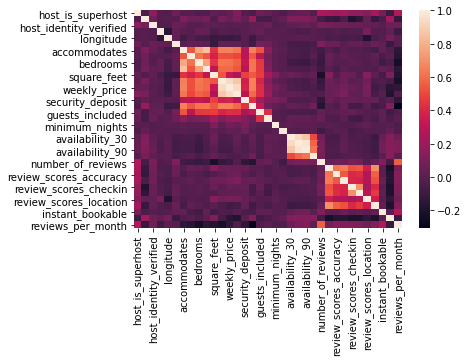

In [92]:
sns.heatmap(df_1drop[df_1drop.columns[0:]].corr(), annot=False, fmt=".1f");

In [110]:
X = df_totrain.drop(['price','weekly_price','monthly_price'],axis = 1)
y = df_totrain['price']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [120]:
lm_model = LinearRegression(normalize=False)

In [124]:
lm_model.fit(X_train, y_train)

LinearRegression()

In [125]:
X_test = scaler.transform(X_test)
y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.6235296785857181
2289.189898690522


(1, 31)


In [7]:
df.shape

(3818, 92)

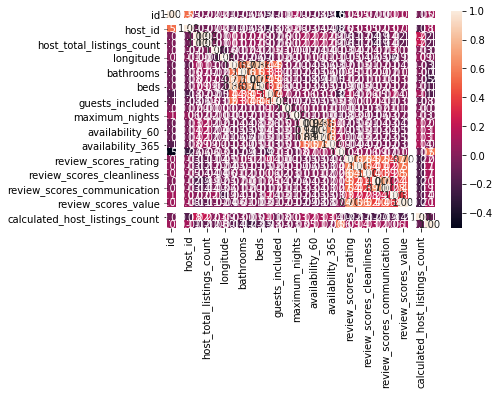

In [8]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [11]:
a=df.price[0]

In [19]:
eval(a)

SyntaxError: invalid syntax (<string>, line 1)

In [14]:
pd.to_numeric(df.price, errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3813   NaN
3814   NaN
3815   NaN
3816   NaN
3817   NaN
Name: price, Length: 3818, dtype: float64

In [49]:
df1 = 


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64